### Use logistic regression for MNIST

Logistic regression can be implemented by a FC layer, with the cross entropy loss. To use it for MNIST, we can "flatten" the input data into a 1D array, and use a trainable FC layer

**important**: before turning in your final notebook for grading, make sure to make a "clean" run. Choose "Restart & Run All" from the "Kernel" pulldown menu. The indices of runs **must** be sequential and start with 1

**important**: rename the notebook with your UID as the prefix, such as jdoe001_xxxxxxx.ipynb


In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.utils as utils
import random

In [2]:
# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
## To be implemented
## load MNIST and print stats

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Print the stats
print(f"Number of training samples: {len(trainset)}")
print(f"Number of testing samples: {len(testset)}")

Number of training samples: 60000
Number of testing samples: 10000


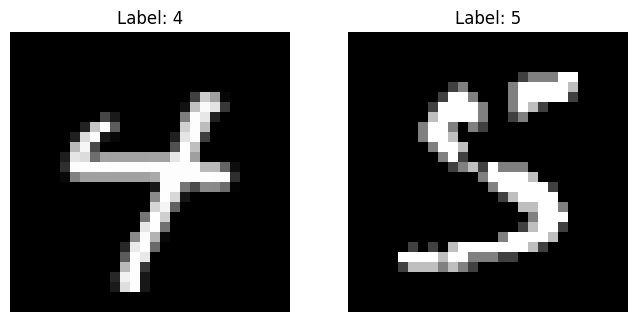

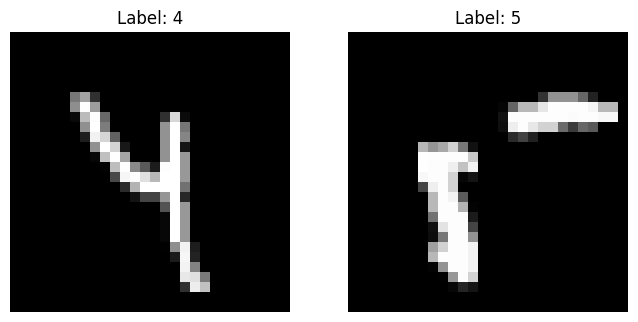

In [4]:
## To be implemented
## visualize as 2x2 panel, randomly choose 2 from training and 2 from test sets
def visualize_selected_images(dataset, selected_labels):
    plt.figure(figsize=(8, 8))
    for i, label in enumerate(selected_labels, 1):
        # Filter images by label
        filtered_indices = [idx for idx, (_, target) in enumerate(dataset) if target == label]
        # Randomly select an image
        selected_index = random.choice(filtered_indices)
        image, label = dataset[selected_index]
        plt.subplot(2, 2, i)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')

# Selected labels to visualize
selected_labels = [4, 5]

# Visualize selected labels from training set
visualize_selected_images(trainset, selected_labels)

# Visualize selected labels from test set
visualize_selected_images(testset, selected_labels)

**Important**: make sure to use your best hyper-parameters, I have achieved the test accuracy of >88% by tuning them, using CPU only

In [5]:
## put your best hyperparameters
## hyperparameters
input_size = 28*28  #Size of image
num_classes = 10  #the image number are in range 0-10
num_epochs = 5 #one cycle through the full train data
batch_size = 100 #sample size consider before updating the model’s weights
learning_rate = 0.01  #step size to update parameter

In [6]:
## To be implemented
## create dataloaders
train_loader = utils.data.DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True)
test_loader = utils.data.DataLoader(dataset=testset, batch_size=batch_size, shuffle=False)

In [7]:
## To be implemented
## build the model
class LogisticRegression(nn.Module):
  def __init__(self, input_size, num_classes):
    super(LogisticRegression, self).__init__()
    # Define the fully connected layer
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, x):
    # Flatten the image tensors
    x = x.view(-1, input_size)
    # Forward pass through the linear layer
    out = self.linear(x)
    return out

In [8]:
## set up loss and optimizer
model = LogisticRegression(input_size,num_classes)
loss = nn.CrossEntropyLoss()
## you are free to use other optimizers
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [9]:
## To be implemented
## training test testing
for epoch in range(num_epochs):
    ## your code here
    model.train()  # Set the model to training mode
    for i, (images, labels) in enumerate(train_loader):
        # Flatten MNIST images to a 784 vector for each image
        images = images.view(-1, 28*28)

        # Forward pass
        outputs = model(images)
        compute_loss = loss(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        compute_loss.backward()
        optimizer.step()

        ## printing training losses
        if (i+1) % 200 == 0:
            print('Iternation: {0}, training loss = {1:.3f}'.format(i+1,compute_loss.item()))


    ## Run testing after each epoch
    model.eval()
    with torch.no_grad():
        total = 0
        accurate = 0

        ## your code here
        for images, labels in test_loader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accurate += (predicted == labels).sum().item()


        accuracy_score = 100*accurate/total
        print('==> Epoch: {0}, test accuracy = {1:.3f}'.format(epoch, accuracy_score))

print('Final Accuracy = {0:.2f}%'.format(accuracy_score))

Iternation: 200, training loss = 0.613
Iternation: 400, training loss = 0.544
Iternation: 600, training loss = 0.492
==> Epoch: 0, test accuracy = 88.660
Iternation: 200, training loss = 0.372
Iternation: 400, training loss = 0.381
Iternation: 600, training loss = 0.311
==> Epoch: 1, test accuracy = 89.940
Iternation: 200, training loss = 0.436
Iternation: 400, training loss = 0.428
Iternation: 600, training loss = 0.286
==> Epoch: 2, test accuracy = 90.450
Iternation: 200, training loss = 0.308
Iternation: 400, training loss = 0.252
Iternation: 600, training loss = 0.356
==> Epoch: 3, test accuracy = 90.730
Iternation: 200, training loss = 0.237
Iternation: 400, training loss = 0.268
Iternation: 600, training loss = 0.438
==> Epoch: 4, test accuracy = 90.950
Final Accuracy = 90.95%


In [10]:
## model stats
print(model)

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [11]:
## optional, print model statistics
from torchsummary import summary
summary(model, input_size=(1, 28*28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------
